In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('attacks_data_UTF8.csv')

In [4]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df = df.set_index('Index')

In [5]:
df.head()

,Date,Country,City,Killed,Injured,Description
Index,,,,,,
1,2002-01-01,Indonesia,Palu,1,0,Four bombs explode at Christian churches and o...
2,2002-01-01,India,Baramulla,1,0,Terrorists enter the home of a civilian and ki...
3,2002-01-01,India,Poshkar,2,0,Two civilians are abducted from their homes th...
4,2002-01-02,India,Rajouri,6,9,Three separate terror attacks in the district ...
5,2002-01-02,India,Jehangir Chowk,2,25,A Muslim militant kills two and injures twenty...


In [6]:

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# df types of columns
print("\ndf Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Number of unique values in each column
print("\nUnique Values:")
print(df.nunique())

# Grouping and aggregation
print("\nAggregated Statistics:")
grouped_df = df.groupby('Country').agg({'Killed': 'sum', 'Injured': 'sum'})
print(grouped_df)




Summary Statistics:
             Killed       Injured
count  29364.000000  29364.000000
mean       6.659822      9.399537
std       24.164587     31.126073
min        0.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        6.000000      8.000000
max     2000.000000   1841.000000

df Types:
Date           object
Country        object
City           object
Killed          int64
Injured         int64
Description    object
dtype: object

Missing Values:
Date           0
Country        0
City           0
Killed         0
Injured        0
Description    1
dtype: int64

Unique Values:
Date            5173
Country           98
City            6499
Killed           171
Injured          239
Description    29066
dtype: int64

Aggregated Statistics:
             Killed  Injured
Country                     
Afghanistan   15091    20029
Algeria        2011     1907
Angola            1       40
Australia         4        8
Austria           5       34
..

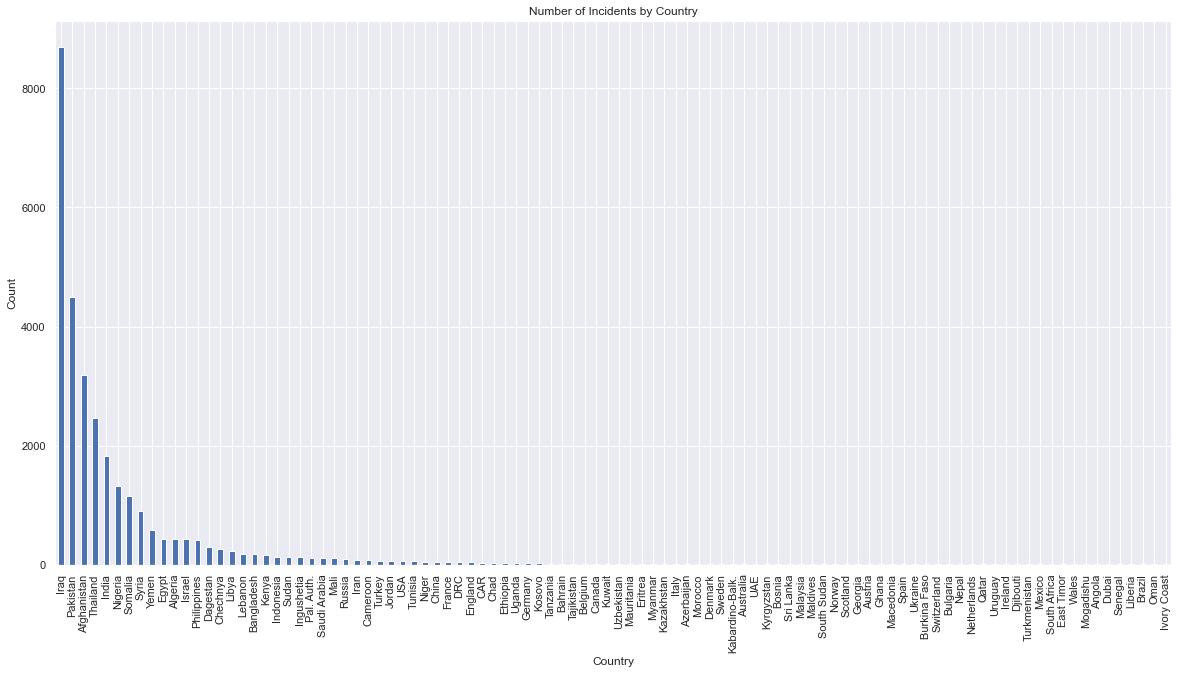

In [39]:
# Plotting
import matplotlib.pyplot as plt

# Bar plot of the number of incidents by country
plt.figure(figsize=(20,10))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Incidents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()



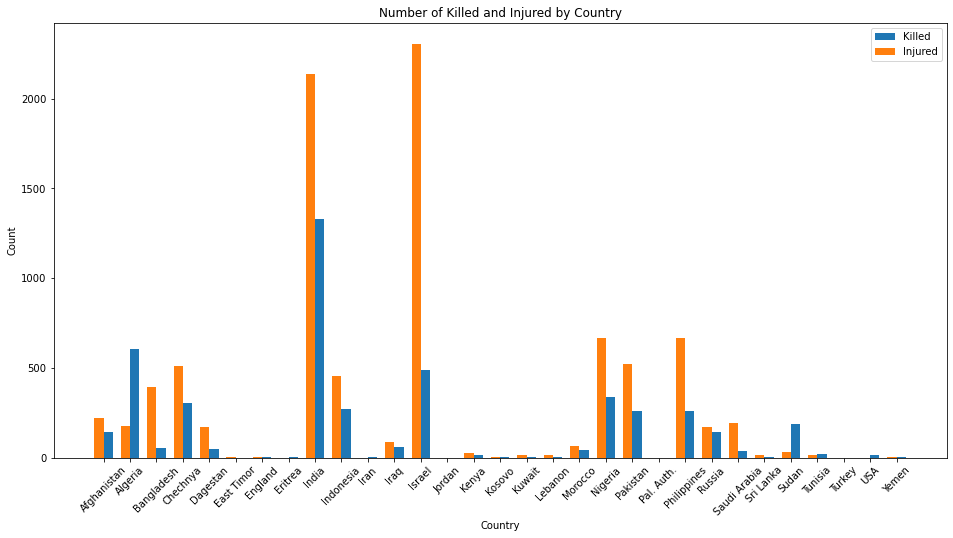

In [8]:
# Grouping and aggregation
grouped_df = df[:1000].groupby('Country').agg({'Killed': 'sum', 'Injured': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(grouped_df['Country'], grouped_df['Killed'], label='Killed',width = 0.35,align='edge')
plt.bar(grouped_df['Country'], grouped_df['Injured'], label='Injured',width=-0.35,align='edge')
plt.title('Number of Killed and Injured by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

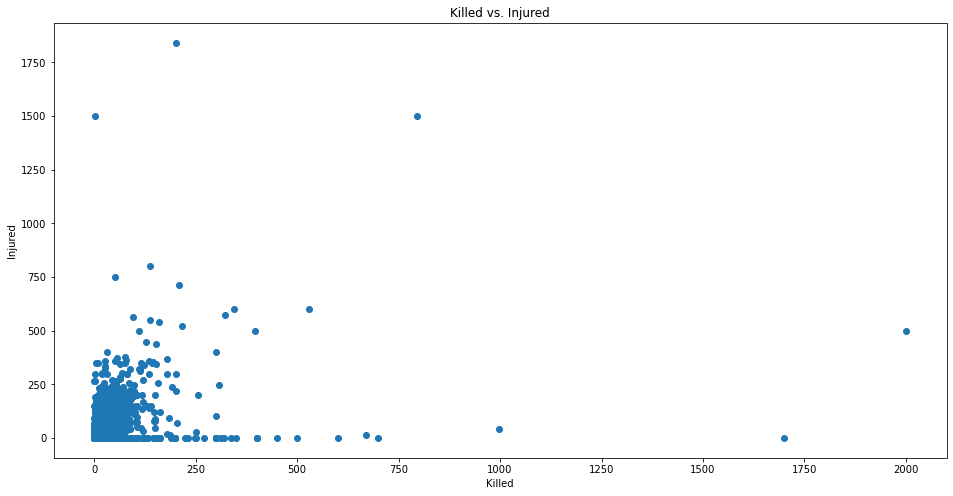

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(df['Killed'], df['Injured'])
plt.title('Killed vs. Injured')
plt.xlabel('Killed')
plt.ylabel('Injured')
plt.show()

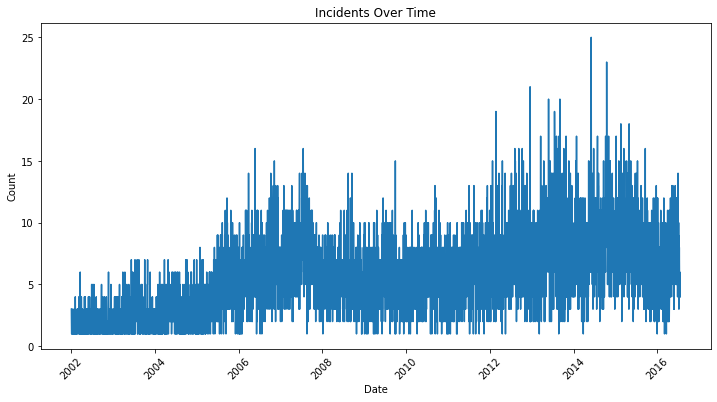

In [10]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Grouping incidents by date
incidents_by_date = df.groupby('Date').size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(incidents_by_date['Date'], incidents_by_date['Count'])
plt.title('Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can clearly see that the number of terrorist incidents increased over time


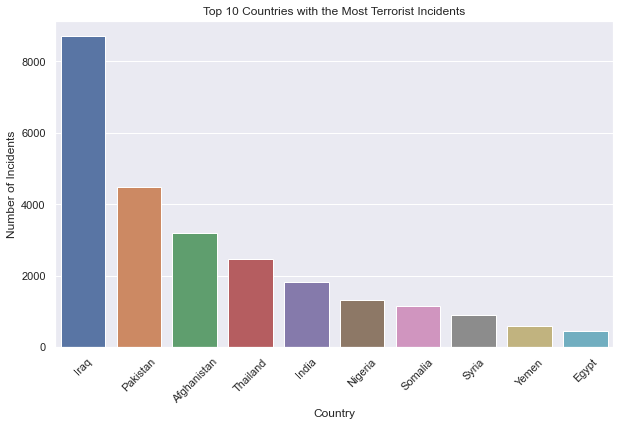

In [40]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Top 10 countries with the most terrorist incidents
top10_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_countries.index, y=top10_countries.values)
plt.title('Top 10 Countries with the Most Terrorist Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

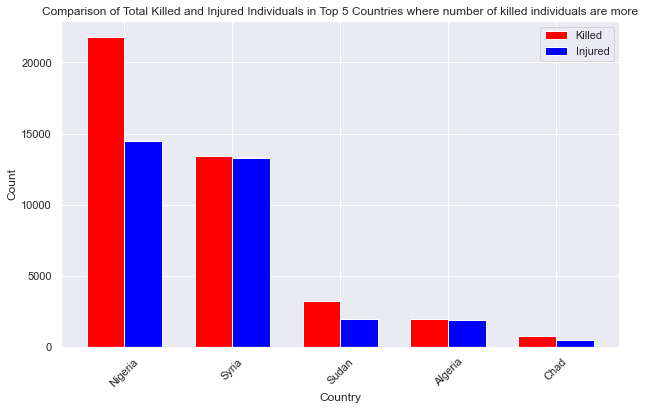

In [31]:
# Calculate the total number of killed and injured individuals for each country
total_killed_injured = df.groupby('Country')[['Killed', 'Injured']].sum()

# Select the top 5 countries where the total number of killed individuals is greater than the total number of injured individuals
top_countries = total_killed_injured[total_killed_injured['Killed'] > total_killed_injured['Injured']].nlargest(5, 'Killed')

# Set the width of the bars
bar_width = 0.35

# Create the index for the x-axis ticks
ind = np.arange(len(top_countries))

plt.figure(figsize=(10, 6))
plt.bar(ind, top_countries['Killed'], width=bar_width, color='red', label='Killed')
plt.bar(ind + bar_width, top_countries['Injured'], width=bar_width, color='blue', label='Injured')
plt.title('Comparison of Total Killed and Injured Individuals in Top 5 Countries where number of killed individuals are more')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(ind + bar_width / 2, top_countries.index, rotation=45)
plt.legend()
plt.show()

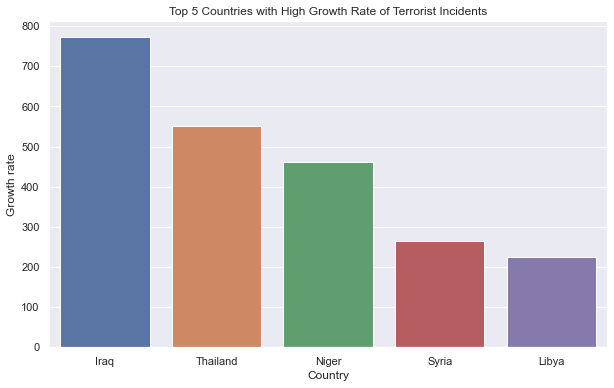

In [37]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group incidents by country and year
df['Year'] = df['Date'].dt.year
incidents_by_year = df.groupby(['Country', 'Year']).size().unstack()

# Calculate the growth rate for each country
growth_rate = incidents_by_year.pct_change(axis=1)
growth_rate = growth_rate.iloc[:, 1:].mean(axis=1) * 100
growth_rate = growth_rate.nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=growth_rate.index, y=growth_rate.values)
plt.title('Top 5 Countries with High Growth Rate of Terrorist Incidents')
plt.xlabel('Country')
plt.ylabel('Growth rate')
plt.show()